<a href="https://colab.research.google.com/github/hoonzi-s/hongong_mldl/blob/main/03-2.%20%EC%84%A0%ED%98%95%20%ED%9A%8C%EA%B7%80.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [4]:
import numpy as np
perch_length = np.array([8.4, 13.7, 15.0, 16.2, 17.4, 18.0, 18.7, 19.0, 19.6, 20.0, 21.0,
       21.0, 21.0, 21.3, 22.0, 22.0, 22.0, 22.0, 22.0, 22.5, 22.5, 22.7,
       23.0, 23.5, 24.0, 24.0, 24.6, 25.0, 25.6, 26.5, 27.3, 27.5, 27.5,
       27.5, 28.0, 28.7, 30.0, 32.8, 34.5, 35.0, 36.5, 36.0, 37.0, 37.0,
       39.0, 39.0, 39.0, 40.0, 40.0, 40.0, 40.0, 42.0, 43.0, 43.0, 43.5,
       44.0])
perch_weight = np.array([5.9, 32.0, 40.0, 51.5, 70.0, 100.0, 78.0, 80.0, 85.0, 85.0, 110.0,
       115.0, 125.0, 130.0, 120.0, 120.0, 130.0, 135.0, 110.0, 130.0,
       150.0, 145.0, 150.0, 170.0, 225.0, 145.0, 188.0, 180.0, 197.0,
       218.0, 300.0, 260.0, 265.0, 250.0, 250.0, 300.0, 320.0, 514.0,
       556.0, 840.0, 685.0, 700.0, 700.0, 690.0, 900.0, 650.0, 820.0,
       850.0, 900.0, 1015.0, 820.0, 1100.0, 1000.0, 1100.0, 1000.0,
       1000.0])

In [9]:
from sklearn.model_selection import train_test_split as tts
train_input, test_input, train_target, test_target = tts(perch_length, perch_weight, random_state = 42)
train_input = train_input.reshape(-1, 1)
test_input = test_input.reshape(-1, 1)

from sklearn.linear_model import LinearRegression
lr = LinearRegression()
lr.fit(train_input, train_target)
print(lr.predict([[50]]))

[1241.83860323]


In [11]:
# 선형 회귀 모델이 찾은 y = ax + b에서의 a, b
a = lr.coef_
b = lr.intercept_
print(f'a = {a}, b = {b}')

a = [39.01714496], b = -709.0186449535477


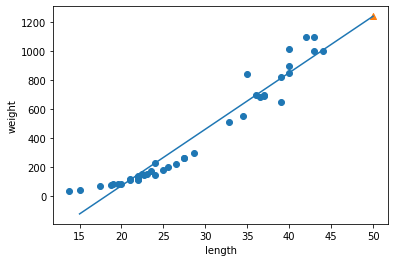

In [14]:
# 직선 그리기
import matplotlib.pyplot as plt
plt.scatter(train_input, train_target)
plt.plot([15, 50], [15 * a + b, 50 * a + b])
plt.scatter(50, 1241.8, marker = '^')
plt.xlabel('length')
plt.ylabel('weight')
plt.show()


In [15]:
# 훈련 점수 확인
print(lr.score(train_input, train_target))
print(lr.score(test_input, test_target))

0.939846333997604
0.8247503123313558


In [27]:
# 훈련 점수는 과소적합(둘 다 낮으므로), 그래프도 무언가 이상하다
# 길이와 무게의 관계가 2차 함수라면?

train_poly = np.column_stack((train_input ** 2, train_input))
test_poly = np.column_stack((test_input ** 2, test_input))
print(train_poly.shape, test_poly.shape)

(42, 2) (14, 2)


In [28]:
lr = LinearRegression()
lr.fit(train_poly, train_target)
lr.predict([[50**2, 50]])

array([1573.98423528])

In [31]:
a1 = lr.coef_[0]
a2 = lr.coef_[1]
b = lr.intercept_

print(f'a1 = {a1}, a2 = {a2}, b = {b}')

a1 = 1.0143321093767301, a2 = -21.557924978837352, b = 116.0502107827827


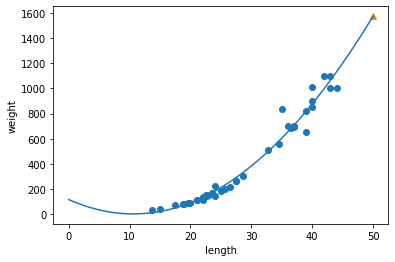

In [37]:
x = np.arange(0, 51)
plt.scatter(train_input, train_target)
plt.scatter(50, 1574, marker = '^')
plt.plot(a1 * x ** 2 + a2 * x + b)
plt.xlabel('length')
plt.ylabel('weight')
plt.show()

In [39]:
print(lr.score(train_poly, train_target))
print(lr.score(test_poly, test_target))

0.9706807451768623
0.9775935108325122


In [ ]:
# 과제. 과소적합을 어떻게 해결할 것인가?